In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | hervey bay
Processing Record 9 of Set 1 | makakilo city
Processing Record 10 of Set 1 | apaxtla
City not found. Skipping...
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | meyungs
City not found. Skipping...
Processing Record 19 of Set 1 | waingapu
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | tuatapere
Pr

City not found. Skipping...
Processing Record 35 of Set 4 | nhulunbuy
Processing Record 36 of Set 4 | manta
Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | leningradskiy
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | ca mau
Processing Record 42 of Set 4 | hobbs
Processing Record 43 of Set 4 | hermiston
Processing Record 44 of Set 4 | pafos
Processing Record 45 of Set 4 | cradock
Processing Record 46 of Set 4 | hauterive
Processing Record 47 of Set 4 | sechura
Processing Record 48 of Set 4 | zhezkazgan
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | baturaja
Processing Record 1 of Set 5 | majene
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | wattegama
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | aitape
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | sinnamary
Proces

Processing Record 26 of Set 8 | poum
Processing Record 27 of Set 8 | turukhansk
Processing Record 28 of Set 8 | tazovskiy
Processing Record 29 of Set 8 | albanel
Processing Record 30 of Set 8 | abnub
Processing Record 31 of Set 8 | zlobin
Processing Record 32 of Set 8 | qaqortoq
Processing Record 33 of Set 8 | saint george
Processing Record 34 of Set 8 | araouane
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | karratha
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | allende
Processing Record 39 of Set 8 | laguna
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | los llanos de aridane
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | voi
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | yatou
Processing Record 47 of Set 8 | tawkar
City not found. Skipping...
Processing Record 48 of Set 8 | mbamba
Processing Re

Processing Record 13 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 14 of Set 12 | morada nova
Processing Record 15 of Set 12 | megion
Processing Record 16 of Set 12 | atar
Processing Record 17 of Set 12 | mahebourg
Processing Record 18 of Set 12 | flinders
Processing Record 19 of Set 12 | sorvag
City not found. Skipping...
Processing Record 20 of Set 12 | ngorongoro
Processing Record 21 of Set 12 | manakara
Processing Record 22 of Set 12 | coihaique
Processing Record 23 of Set 12 | santa cruz
Processing Record 24 of Set 12 | clyde river
Processing Record 25 of Set 12 | fare
Processing Record 26 of Set 12 | guozhen
Processing Record 27 of Set 12 | tadine
Processing Record 28 of Set 12 | reichenau
Processing Record 29 of Set 12 | kamien pomorski
Processing Record 30 of Set 12 | saint-augustin
Processing Record 31 of Set 12 | sabaudia
Processing Record 32 of Set 12 | wagar
Processing Record 33 of Set 12 | tamiahua
Processing Record 34 of Set 12 | ust-nera
Proc

In [20]:
len(city_data)

580

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.94,80,96,14.61,NZ,2021-11-15 03:43:41
1,Ushuaia,-54.8000,-68.3000,40.66,87,90,23.02,AR,2021-11-15 03:40:22
2,Tiksi,71.6872,128.8694,-14.44,98,45,6.96,RU,2021-11-15 03:43:42
3,Hilo,19.7297,-155.0900,78.53,87,75,5.75,US,2021-11-15 03:43:42
4,Albany,42.6001,-73.9662,41.63,82,100,6.20,US,2021-11-15 03:42:45
5,Broome,42.2506,-75.8330,36.86,79,90,1.01,US,2021-11-15 03:43:43
6,Lebu,-37.6167,-73.6500,51.49,91,26,7.45,CL,2021-11-15 03:43:44
7,Hervey Bay,-25.2986,152.8535,86.04,52,0,12.62,AU,2021-11-15 03:43:44
8,Makakilo City,21.3469,-158.0858,79.12,71,90,0.00,US,2021-11-15 03:43:44
9,Thompson,55.7435,-97.8558,24.96,74,90,4.61,CA,2021-11-15 03:43:45


In [26]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [27]:
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-11-15 03:43:41,-46.6000,168.3333,53.94,80,96,14.61
1,Ushuaia,AR,2021-11-15 03:40:22,-54.8000,-68.3000,40.66,87,90,23.02
2,Tiksi,RU,2021-11-15 03:43:42,71.6872,128.8694,-14.44,98,45,6.96
3,Hilo,US,2021-11-15 03:43:42,19.7297,-155.0900,78.53,87,75,5.75
4,Albany,US,2021-11-15 03:42:45,42.6001,-73.9662,41.63,82,100,6.20
5,Broome,US,2021-11-15 03:43:43,42.2506,-75.8330,36.86,79,90,1.01
6,Lebu,CL,2021-11-15 03:43:44,-37.6167,-73.6500,51.49,91,26,7.45
7,Hervey Bay,AU,2021-11-15 03:43:44,-25.2986,152.8535,86.04,52,0,12.62
8,Makakilo City,US,2021-11-15 03:43:44,21.3469,-158.0858,79.12,71,90,0.00
9,Thompson,CA,2021-11-15 03:43:45,55.7435,-97.8558,24.96,74,90,4.61


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

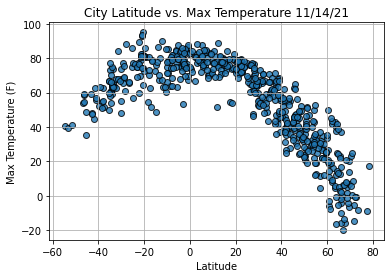

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

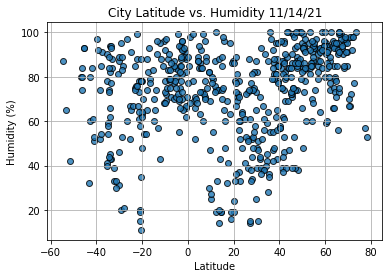

In [35]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

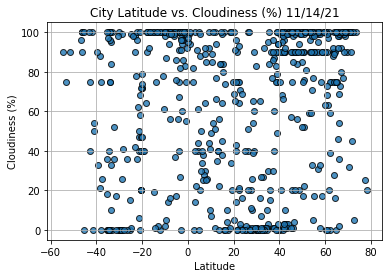

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

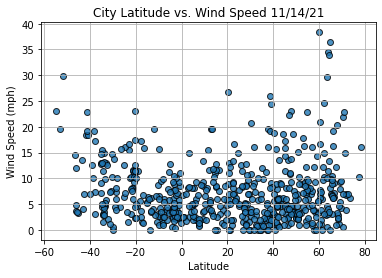

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()